# Heart Disease Prediction using Logistic Regression 
---

#### Objective
To predict whether a patient has heart disease based on clinical and lifestyle features using a logistic regression model.

|**Column Name** | **Description**                                                                                           | **Data Type**     | 
| --------------- | --------------------------------------------------------------------------------------------------------- | ----------------- | 
| `age`           | Age of the patient in years                                                                               | Numeric (int)     | 
| `sex`           | Sex of the patient (1 = male, 0 = female)                                                                 | Categorical (int) | 
| `cp`            | Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal, 3 = asymptomatic)              | Categorical (int) | 
| `trestbps`      | Resting blood pressure (in mm Hg on admission)                                                            | Numeric (int)     | 
| `chol`          | Serum cholesterol level (mg/dl)                                                                           | Numeric (int)     | 
| `fbs`           | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)                                                     | Binary (int)      | 
| `restecg`       | Resting electrocardiographic results (0 = normal, 1 = ST-T abnormality, 2 = left ventricular hypertrophy) | Categorical (int) | 
| `thalach`       | Maximum heart rate achieved                                                                               | Numeric (int)     | 
| `exang`         | Exercise-induced angina (1 = yes, 0 = no)                                                                 | Binary (int)      | 
| `oldpeak`       | ST depression induced by exercise relative to rest                                                        | Numeric (float)   | 
| `slope`         | Slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)                          | Categorical (int) | 
| `ca`            | Number of major vessels (0-3) colored by fluoroscopy                                                      | Numeric (int)     | 
| `thal`          | Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect)                                         | Categorical (int) | 
| `target`        | Diagnosis of heart disease (1 = disease, 0 = no disease)                                                  | Binary (int)      | 


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score 

# Setting visualization style
sns.set(style="whitegrid")

Data Source: [Kaggle Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data)

In [2]:
# Loading the dataset into a dataframe
heart_df=pd.read_csv("heart.csv")

In [3]:
# Displaying the first 5 rows
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Checking the shape of the dataset
print(f"The dataset contains {heart_df.shape[0]} rows and {heart_df.shape[1]} columns.")

# Getting a summary of the dataset using descriptive statistics
print("\nSummary of the numerical columns:")
heart_df.describe().T

The dataset contains 1025 rows and 14 columns.

Summary of the numerical columns:


,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [5]:
# Getting further information about the dataset 
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Checking for missing values
heart_df.isnull().sum().any()

False

In [7]:
# Checking for duplicates
heart_df.duplicated().sum()

723

In [8]:
# Inspecting duplicated rows
heart_df[heart_df.duplicated(keep=False)].sort_values(by=list(heart_df.columns)).head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
779,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
143,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
201,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
572,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1


In [9]:
# Dropping duplicate rows
heart_df.drop_duplicates(inplace=True)

In [10]:
# Checking the shape of the dataset after dropping duplicates
print(f"The dataset contains {heart_df.shape[0]} rows and {heart_df.shape[1]} columns.")

The dataset contains 302 rows and 14 columns.


723 duplicate rows (70%) were removed to maintain data quality.

In [11]:
# Checking the count of each target class
heart_df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [12]:
# Checking the percentage of each target class
heart_df['target'].value_counts(normalize=True) * 100

target
1    54.304636
0    45.695364
Name: proportion, dtype: float64

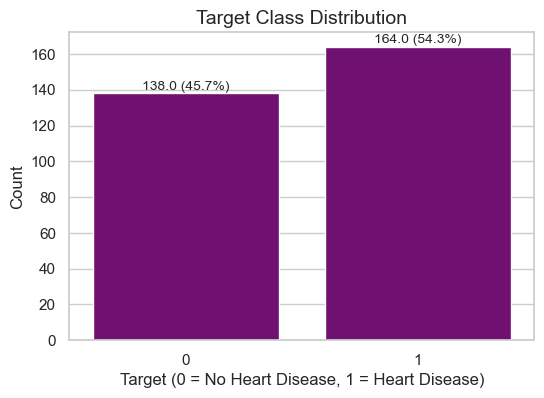

In [13]:
# Plotting the distribution
plt.figure(figsize=(6,4))
ax = sns.countplot(x='target', data=heart_df, color='purple')
plt.title('Target Class Distribution', fontsize=14)
plt.xlabel('Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Count')

# Adding count & percentage labels above bars
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / len(heart_df)
    ax.text(p.get_x() + p.get_width()/2., height + 2,
            f'{height} ({percentage:.1f}%)',
            ha='center', fontsize=10)
plt.show()

The dataset is balanced (roughly a 50/50 split), so I can train the logistic regression model without worrying about bias toward either class.

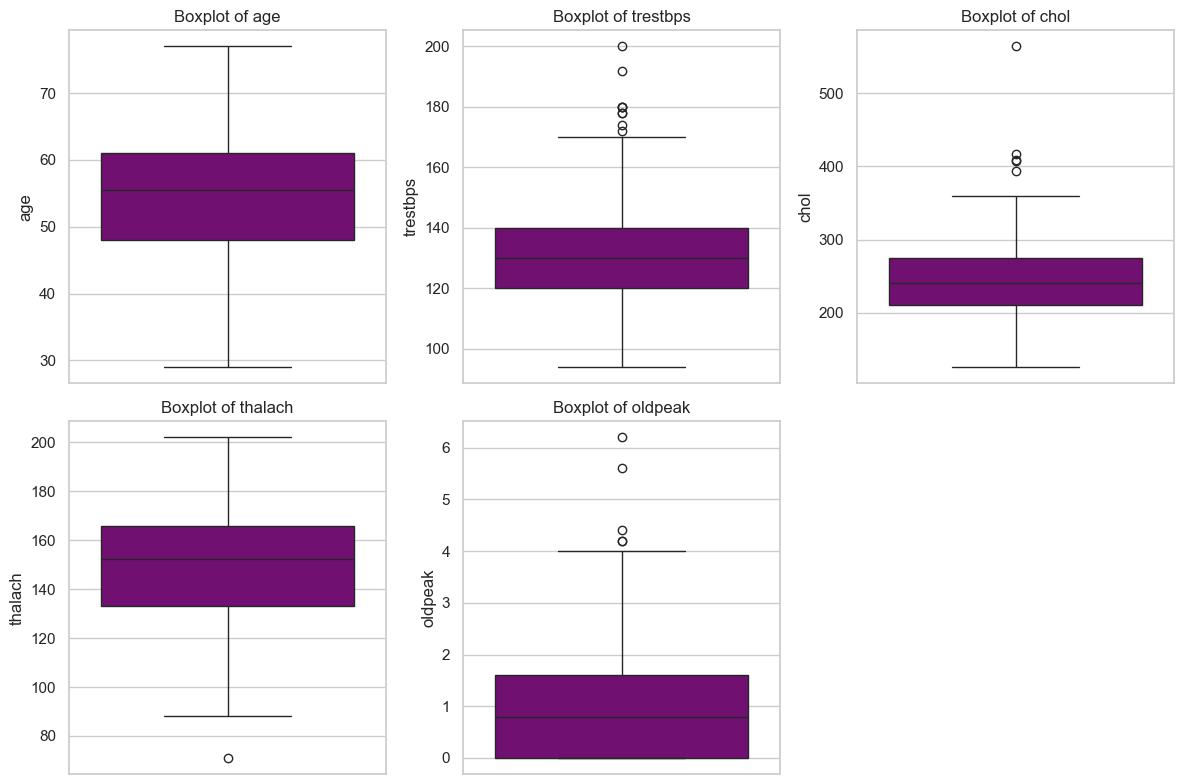

In [14]:
cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(12,8))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=heart_df[col], color='purple')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In clinical datasets, very high or low readings may be real medical conditions, not errors. Therefore, I would leave the outliers, as they may represent real patients with genuine extreme values.

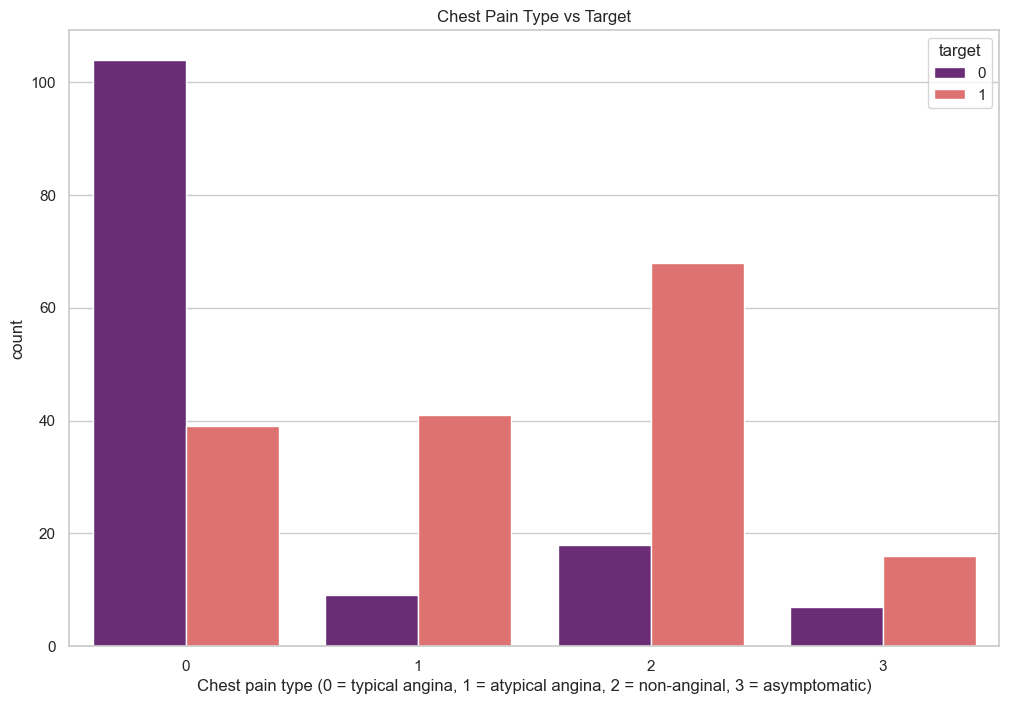

In [15]:
# Chest Pain Type vs Target
plt.figure(figsize=(12,8))
sns.countplot(x="cp", hue="target", data=heart_df, palette='magma')
plt.title("Chest Pain Type vs Target")
plt.xlabel('Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal, 3 = asymptomatic)')
plt.show()

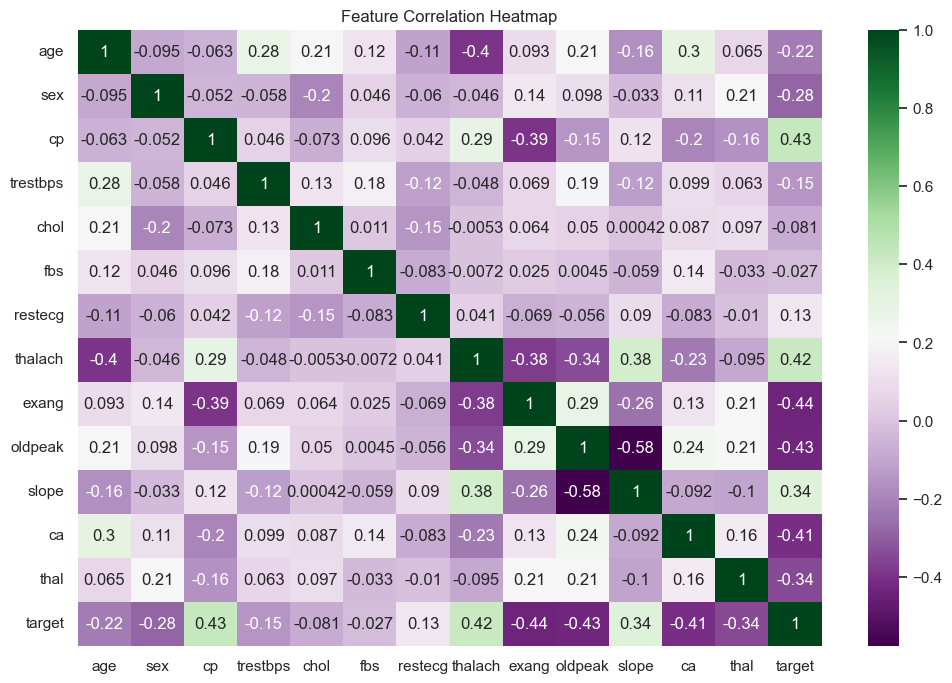

In [16]:
# Multivariate analysis: Showing correlation of features with Heatmap 
plt.figure(figsize=(12,8))
sns.heatmap(heart_df.corr(), cmap='PRGn', annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()


The correlation heatmap reveals how each feature relates to the target variable (heart disease presence). Among all features, only a few show positive correlations with the target:
|Feature|Value|Interpretation|
|----|----|----|
|Chest Pain Type (cp)|0.43|This shows a moderately strong positive relationship, meaning patients with certain types of chest pain are more likely to have heart disease.|
Maximum Heart Rate Achieved (thalach)|0.42|Indicates that higher maximum heart rates are associated with a greater likelihood of heart disease in this dataset.|
Slope of the Peak Exercise ST Segment (slope)|0.34|Suggests that changes in the ST segment slope during exercise testing may be predictive of heart disease.|
Resting Electrocardiographic Results (restecg)|0.13|Shows a weak but positive correlation, implying some ECG variations at rest might be linked to heart disease.|

Overall, ‘cp’ and ‘thalach’ show the strongest positive relationships with heart disease, meaning they are potentially the most influential features in identifying patients at risk. The remaining features have weak or negative correlations, suggesting they may play less direct roles individually but could still contribute when combined in the model.

In [17]:
# Defining the feature and the target
X = heart_df.drop('target', axis=1)
y = heart_df['target']

In [18]:
# Confirming the shape of the feature matrix
X.shape

(302, 13)

In [19]:
# Confirming the shape of the target vector
y.shape

(302,)

In [20]:
# Splitting the data into training (80%) and testing (20%) sets while maintaining balance in the target variable
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
# Standardizing feature values
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Initializing  and fit the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [23]:
# Making predictions
y_pred = model.predict(X_test_scaled)

Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



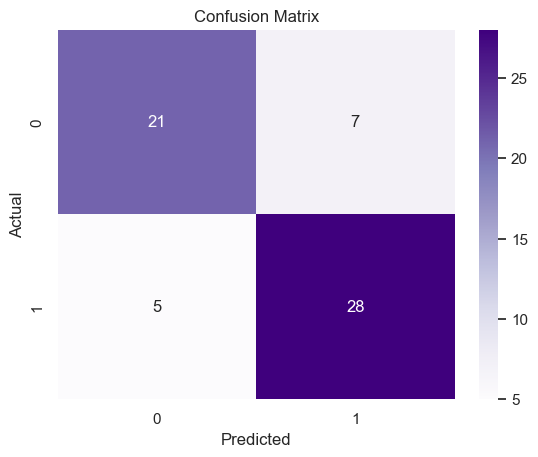

In [24]:
# Evaluating Model's Performance
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Model's Performance Evaluation Summary**
| Metric                        | Value          | Meaning                                                                                  |
| ----------------------------- | -------------- | ---------------------------------------------------------------------------------------- |
| **Accuracy**                  | **0.80 (80%)** | The model correctly predicts heart disease presence or absence in **8 out of 10 cases**. |
| **Precision (class 0)**       | **0.81**       | When the model predicts *no heart disease*, it’s correct **81%** of the time.            |
| **Recall (class 0)**          | **0.75**       | It correctly identifies **75%** of patients who truly don’t have heart disease.          |
| **Precision (class 1)**       | **0.80**       | When the model predicts *heart disease*, it’s correct **80%** of the time.               |
| **Recall (class 1)**          | **0.85**       | It successfully detects **85%** of patients who actually have heart disease.             |
| **F1-score (class 1)**        | **0.82**       | Shows a good balance between precision and recall for detecting heart disease.           |
| **Macro / Weighted Averages** | **≈0.80**      | Both classes are treated fairly evenly as there’s no sign of class bias.                  |


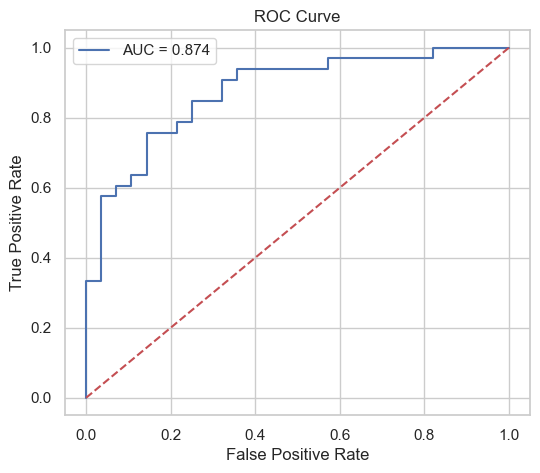

In [25]:
# Predicted probabilities
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Interpretation

The logistic regression model achieved an accuracy of 80%, indicating that it correctly classified 8 out of every 10 patients. Both precision and recall values are well balanced across classes, suggesting consistent model performance. The model performs slightly better in identifying patients with heart disease (recall = 0.85) compared to those without (recall = 0.75), which is desirable in a clinical setting where detecting true positive cases is crucial. The F1-scores (0.78 for class 0 and 0.82 for class 1) further confirm this balance between precision and recall. The ROC curve illustrates the trade-off between sensitivity and specificity. The model’s AUC of 0.874 indicates that the model can correctly distinguish between patients with and without heart disease about 87% of the time (strong discriminative power). Overall, the model demonstrates reliable predictive ability and serves as a strong baseline for detecting heart disease risk.

     Feature  Coefficient
1        sex    -1.522333
8      exang    -0.976439
12      thal    -0.791028
11        ca    -0.692795
9    oldpeak    -0.546959
3   trestbps    -0.376881
4       chol    -0.294314
5        fbs    -0.211575
0        age     0.122052
6    restecg     0.365890
10     slope     0.455692
7    thalach     0.974219
2         cp     1.668261


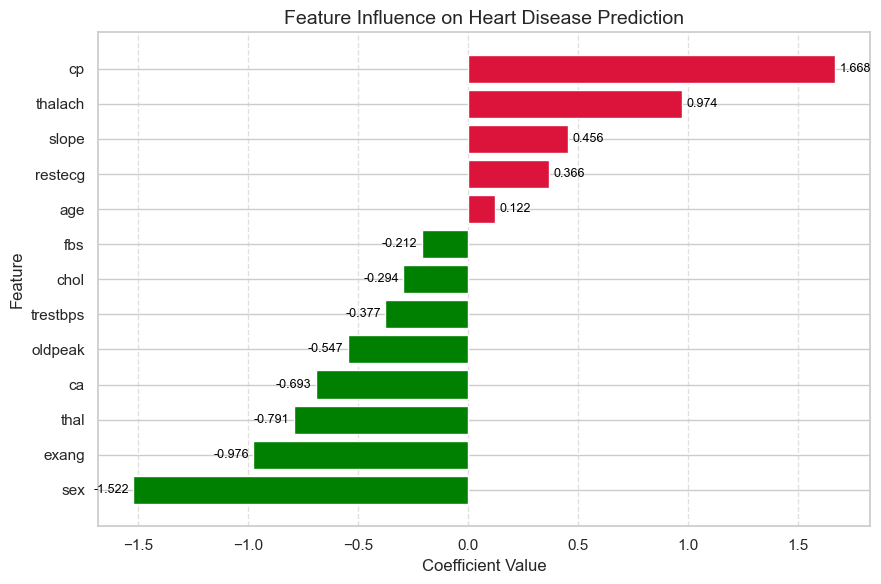

In [26]:
# Create DataFrame of coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})

# Sort values (negative to positive)
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=True)
print(feature_importance)

# Color by sign
colors = feature_importance['Coefficient'].apply(lambda x: 'crimson' if x > 0 else 'green')

# Plot
plt.figure(figsize=(9,6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors)

# Add numeric labels beside bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + (0.02 if width > 0 else -0.02),  # small offset from bar edge
        bar.get_y() + bar.get_height()/2,
        f'{width:.3f}',  # round to 3 decimals
        va='center',
        ha='left' if width > 0 else 'right',
        fontsize=9,
        color='black'
    )

# Titles and labels
plt.title('Feature Influence on Heart Disease Prediction', fontsize=14)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


The chart above shows the direction and strength of influence each feature has on heart disease prediction. Red bars (positive coefficients) indicate features that increase the likelihood of heart disease. Green bars (negative coefficients) indicate features that reduce the likelihood. Displaying the features this way makes it easy to see which variables are risk-enhancing, providing valuable clinical insight into the model’s reasoning.

The model highlights chest pain type, maximum heart rate (thalach), ST segment slope, and resting electrocardiographic results as the strongest predictors of heart disease presence. Meanwhile, features like sex, exercise-induced angina, and thalassemia show negative relationships, indicating that they play inverse roles in prediction. Overall, these results align with known medical patterns where cardiac symptoms, ECG changes, and exercise response are key diagnostic indicators.